In [677]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Data Loading, proceesing,cleaning and handling missing values...

In [678]:
dataset=pd.read_csv("Titanic-Dataset.csv")
dataset.head(5)   #top five values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [679]:
dataset.shape       #Numbers of rows and columns

(891, 12)

In [680]:
dataset.info()    #information about columns and value which are not null and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [681]:
dataset.isnull().sum()    #counts of null values in each columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [682]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [683]:
dataset["Age"].fillna(dataset["Age"].median(),inplace=True)    #using median() to prevent form effects of outliers in ages
dataset.drop(columns=["Cabin"],axis=1,inplace=True)          #dropping column cabin as it has large number of null values
dataset["Embarked"].fillna(dataset["Embarked"].mode()[0],inplace=True)    #using mode()[0] to fill the null value with highest repeating value in Embarked 
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis and Visualization.....

In [684]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
import seaborn as sns

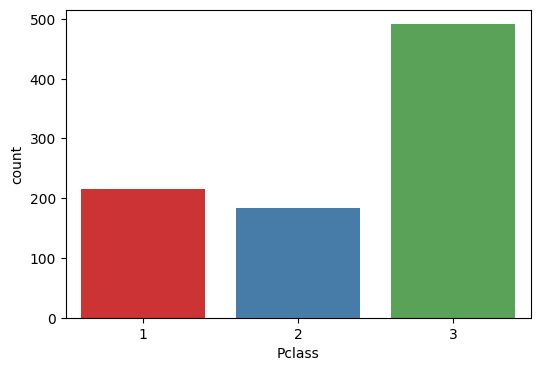

In [685]:
#making Countplot for pclass people
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Pclass",
    palette="Set1",
    data=dataset)
plt.show()

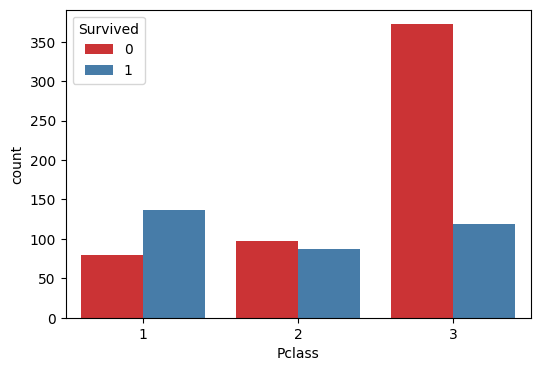

In [686]:
#making Countplot for pclass vs Survived people
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Pclass",
    hue="Survived",
    palette="Set1",
    data=dataset)
plt.show()

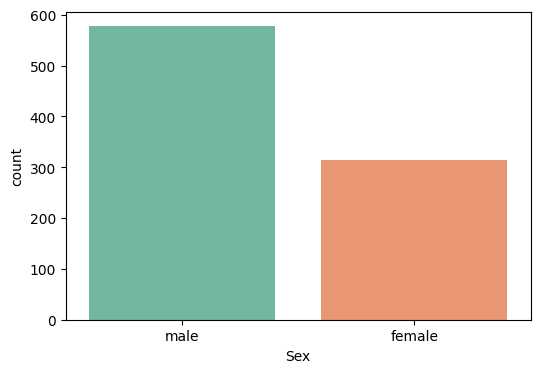

In [687]:
#making Countplot for Sex of people
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Sex",
    palette="Set2",
    data=dataset)
plt.show()

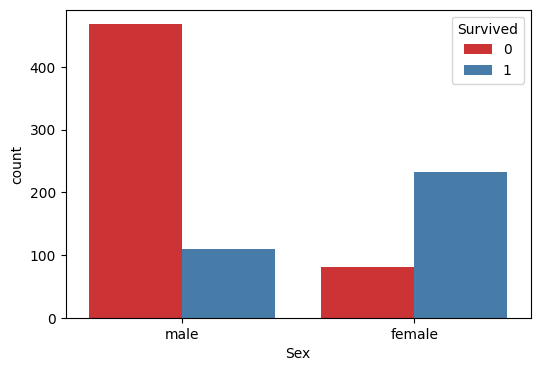

In [688]:
#making Countplot for Sex vs Survived people
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Sex",
    hue="Survived",
    palette="Set1",
    data=dataset)
plt.show()

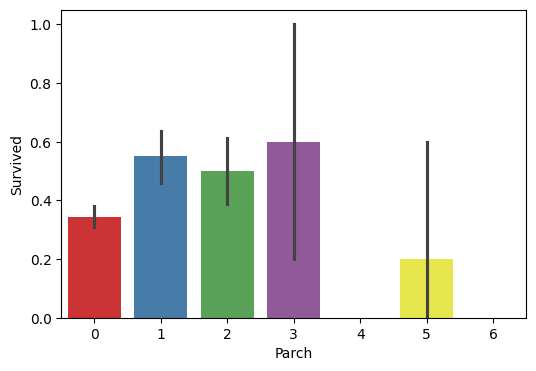

In [689]:
#making barplot for Parent/Children vs Survived people
plt.figure(figsize=(6, 4))
sns.barplot(
    x="Parch",
    y="Survived",
    palette="Set1",
    data=dataset)
plt.show()

Encoding the Categorical Columns

In [690]:
dataset["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [691]:
dataset["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [692]:
#converting Categorical columns to number
dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [693]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating Features and Target

In [694]:
x=dataset.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=dataset['Survived']

In [695]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [696]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Spliting data into training and test data

In [697]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [698]:
x.shape,x_train.shape,x_test.shape

((891, 7), (712, 7), (179, 7))

Modeling Training

In [699]:
#Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [700]:
# K-Nearest Neighbours(KNN)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [701]:
# Decision Tree Classifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [702]:
# Support Vector machine(SVM)
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

In [703]:
#Random Forest Classifer
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

Model Evaluation

In [704]:
#Logistic Regression Evaluation
accuracy_score(y_test,y_pred_lr)
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [705]:
#KNN Evaluation
accuracy_score(y_test,y_pred_knn)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       100
           1       0.70      0.51      0.59        79

    accuracy                           0.69       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.69      0.69      0.68       179



In [706]:
#Decision Tree Evaluation 
accuracy_score(y_test,y_pred_dt)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.77      0.75      0.76        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [707]:
#SVM Evaluation
accuracy_score(y_test,y_pred_svm)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.80      0.61      0.69        79

    accuracy                           0.76       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.76      0.75       179



In [708]:
#Random Forest Evaluation
accuracy_score(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.79      0.73      0.76        79

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [709]:
models=['Logistic Regression','KNN','Decision Tree','SVM','Random Forest']
accuracy=[accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_rf)]
comparision=pd.DataFrame({'Model': models, 'Accuracy': accuracy})
comparision

,Model,Accuracy
0,Logistic Regression,0.782123
1,KNN,0.687151
2,Decision Tree,0.787709
3,SVM,0.759777
4,Random Forest,0.798883


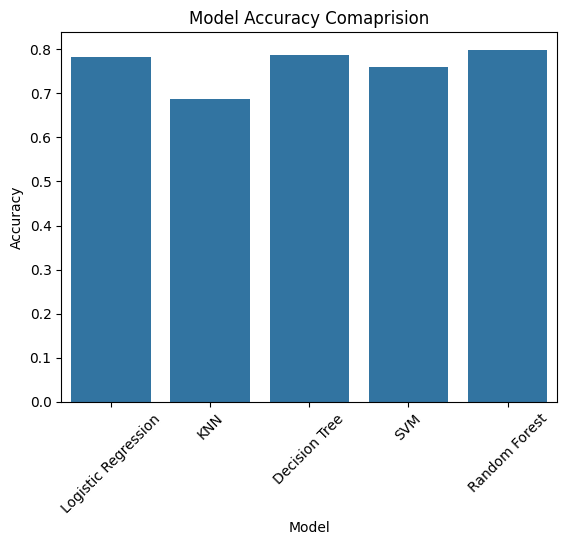

In [710]:
sns.barplot(x='Model',y='Accuracy', data=comparision)
plt.xticks(rotation=45)
plt.title('Model Accuracy Comaprision')
plt.show()

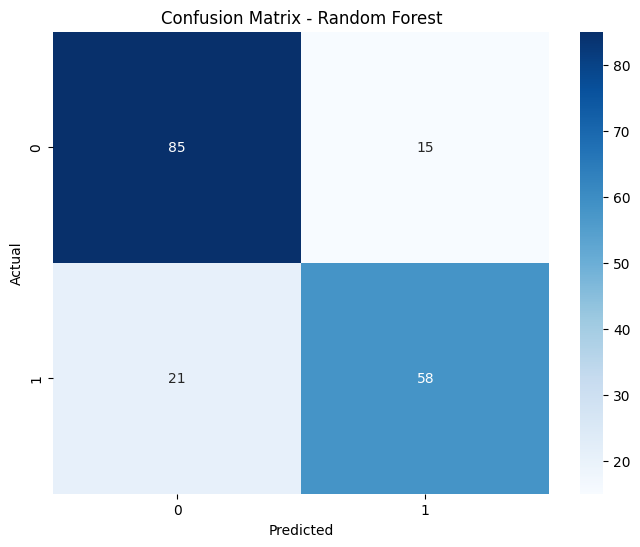

In [711]:
# Using the best model (Random Forest)
best_model = rf
y_pred_best = y_pred_rf

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [712]:
models={'LogisticRegression':LogisticRegression(max_iter=200),'KNN':KNeighborsClassifier(),'Decision Tree':DecisionTreeClassifier(),"SVM":SVC(),"Random Forest": RandomForestClassifier()}
for name,model in models.items():
    scores=cross_val_score(model,x,y,cv=5)
    print(f"{name}: Mean Accuracy = {scores.mean(): .4f}")

LogisticRegression: Mean Accuracy =  0.7935
KNN: Mean Accuracy =  0.6813
Decision Tree: Mean Accuracy =  0.7756
SVM: Mean Accuracy =  0.6746
Random Forest: Mean Accuracy =  0.8059


In [713]:
def predict_titanic(pclass, sex, age, sibsp, parch, fare, embarked,
                    model, scaler=None):

    input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])

    if scaler is not None:
        input_data = scaler.transform(input_data)

    # Prediction (0 = Not Survived, 1 = Survived)
    pred_class = model.predict(input_data)[0]

    # Probability
    if hasattr(model, "predict_proba"):
        pred_prob = model.predict_proba(input_data)[0]
        probabilities = {
            0: round(float(pred_prob[0]), 4),  # Not Survived
            1: round(float(pred_prob[1]), 4)   # Survived
        }
    else:
        probabilities = None

    return pred_class, probabilities


In [714]:
#example 1
result, probs = predict_titanic(
    pclass=3,     #3rd class
    sex=0,        # male
    age=22,
    sibsp=1,
    parch=0,
    fare=7.25,    #low fare
    embarked=0,   
    model=rf,
    scaler=None
)

print("Prediction:", "Survived" if result == 1 else "Not Survived")
print("Probabilities:", probs)


Prediction: Not Survived
Probabilities: {0: 0.91, 1: 0.09}


In [715]:
#Example 2
result, probs = predict_titanic(
    pclass=1,     # 1st class
    sex=1,        # female
    age=30,
    sibsp=0,
    parch=0,
    fare=80,      # high fare
    embarked=1,   
    model=rf,
    scaler=None
)

print("Prediction:", "Survived" if result == 1 else "Not Survived")
print("Probabilities:", probs)

Prediction: Survived
Probabilities: {0: 0.01, 1: 0.99}


                                                                Thank you!!!                                                                     